In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [199]:
data = pd.read_csv('HR_Dataset.csv')

In [200]:
data.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
9792,0.76,0.65,3,254,2,0,0,0,sales,low
8489,0.25,0.98,6,287,5,1,0,0,sales,low
13558,0.69,0.72,4,185,10,1,0,0,management,high
7048,0.24,0.70,5,194,3,0,0,0,sales,low
4655,0.80,0.86,3,136,2,0,0,0,RandD,medium


In [201]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [202]:
data.rename(columns={'Departments ':'departments'},inplace=True)

In [203]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary'],
      dtype='object')

### Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [204]:
data.shape

(14999, 10)

### Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column And Memory Requirement

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Get Overall Statistics About The Dataset

In [206]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Check Null Values In The Dataset

In [207]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
departments              0
salary                   0
dtype: int64

### Taking Care of Duplicate Values

In [208]:
data.duplicated().any()

True

In [209]:
data[data.duplicated()]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [210]:
data = data.drop_duplicates()

In [211]:
data.shape

(11991, 10)

In [212]:
14999 - 11991

3008

<Axes: xlabel='left'>

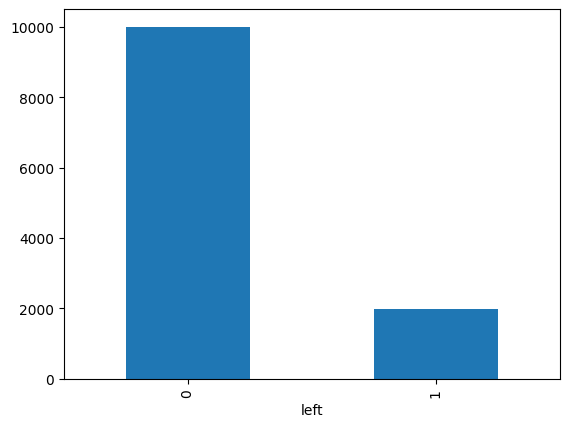

In [213]:
data['left'].value_counts().plot(kind='bar')

In [214]:
data.left.value_counts()


left
0    10000
1     1991
Name: count, dtype: int64

### Number of Projects

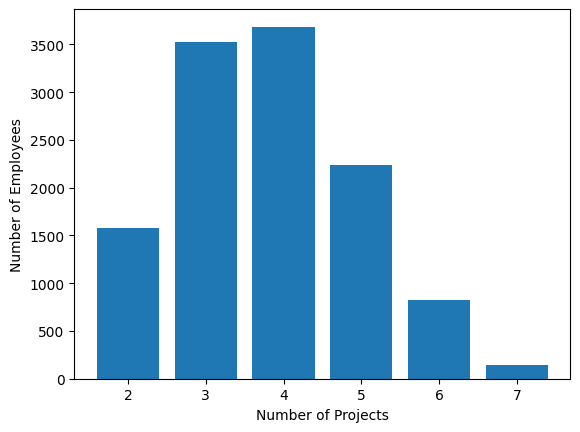

In [215]:
num_projects=data.groupby('number_project').count()
plt.bar(num_projects.index.values, num_projects['satisfaction_level'])
plt.xlabel('Number of Projects')
plt.ylabel('Number of Employees')
plt.show()

### Time Spent in Company


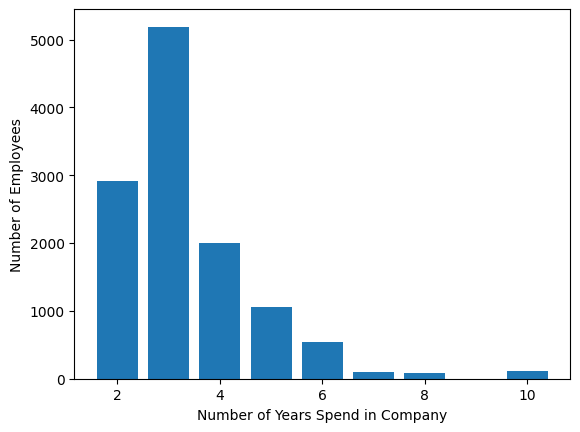

In [216]:
time_spent=data.groupby('time_spend_company').count()
plt.bar(time_spent.index.values, time_spent['satisfaction_level'])
plt.xlabel('Number of Years Spend in Company')
plt.ylabel('Number of Employees')
plt.show()

In [217]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Store Feature Matrix In X and Response(Target) In Vector y

In [218]:
X = data.drop(columns=['left'])
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low
...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high
11996,0.74,0.95,5,266,10,0,1,management,high
11997,0.85,0.54,3,185,10,0,1,management,high
11998,0.33,0.65,3,172,10,0,1,marketing,high


In [219]:
y = data['left']

In [220]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

### Column Transformer and Pipeline

In [221]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [222]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [223]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',LogisticRegression())
])

In [224]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

### Splitting The Dataset Into The Training Set And Test Set

In [225]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)

In [226]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', LogisticRegression())])

In [227]:
y_pred = pipeline.predict(X_test)

In [228]:
accuracy_score(y_test,y_pred)

0.8370154230929554

In [229]:
precision_score(y_test,y_pred)

0.5209580838323353

In [230]:
recall_score(y_test,y_pred)

0.2185929648241206

In [231]:
def model_scorer(model_name,model):
    
    output=[]
    
    output.append(model_name)
    
    pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',model)])
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42,stratify=y)
    
    pipeline.fit(X_train,y_train)
    
    y_pred = pipeline.predict(X_test)
    
    output.append(accuracy_score(y_test,y_pred))
    
    output.append(precision_score(y_test,y_pred))
    
    output.append(recall_score(y_test,y_pred))
    
    return output

In [232]:
model_dict={
    'random_forest':RandomForestClassifier(),
    'XGB':XGBClassifier()
    
}

In [233]:
model_output=[]
for model_name,model in model_dict.items():
    model_output.append(model_scorer(model_name,model))

In [234]:
model_output

[['random_forest', 0.9858274280950396, 0.989247311827957, 0.9246231155778895],
 ['XGB', 0.9837432263443101, 0.9686684073107049, 0.9321608040201005]]

In [235]:
preprocessor = ColumnTransformer(transformers=[
    ('num',StandardScaler(),['satisfaction_level',
                            'last_evaluation',
                            'number_project',
                            'average_montly_hours',
                            'time_spend_company',
                            'Work_accident','promotion_last_5years']),
    ('nominal',OneHotEncoder(),['departments']),
    ('ordinal',OrdinalEncoder(),['salary'])
    
    
],remainder='passthrough')

In [236]:
pipeline = Pipeline([
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier())
    
])

In [237]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['satisfaction_level',
                                                   'last_evaluation',
                                                   'number_project',
                                                   'average_montly_hours',
                                                   'time_spend_company',
                                                   'Work_accident',
                                                   'promotion_last_5years']),
                                                 ('nominal', OneHotEncoder(),
                                                  ['departments']),
                                                 ('ordinal', OrdinalEncoder(),
                                                  ['salary'])])),
                ('model', RandomForestClassifier())])

In [238]:
sample = pd.DataFrame({
   'satisfaction_level':0.38,
   'last_evaluation':0.53,
    'number_project':2,
    'average_montly_hours':157,
    'time_spend_company':3,
    'Work_accident':0,
    'promotion_last_5years':0,
    'departments':'sales',
    'salary':'low'
    
    
},index=[0])

In [239]:
result = pipeline.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### Save The Model

In [240]:
import pickle

In [241]:
with open('pipeline.pkl','wb') as f:
    pickle.dump(pipeline,f)

In [242]:
with open('pipeline.pkl','rb') as f:
    pipeline_saved = pickle.load(f)

In [243]:
result = pipeline_saved.predict(sample)

if result == 1:
    print("An Employee may leave the organization")
else:
    print("An Employee may stay with the organization")

An Employee may leave the organization


### GUI - 1

In [244]:
import pickle
import pandas as pd
from tkinter import *

def show_entry():
    with open('pipeline.pkl','rb') as f:
        pipeline = pickle.load(f)
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    p7 = float(e7.get())
    p8 = str(clicked.get())
    p9 = str(clicked1.get())
    sample = pd.DataFrame({
        'satisfaction_level': [p1],
        'last_evaluation': [p2],
        'number_project': [p3],
        'average_montly_hours': [p4],
        'time_spend_company': [p5],
        'Work_accident': [p6],
        'promotion_last_5years': [p7],
        'departments': [p8],
        'salary': [p9]
    })
    result = pipeline.predict(sample)
    print(result)
    if result == 1:
        Label(master, text="An employee may leave the organization.").grid(row=31)
    else:
        Label(master, text="An employee may stay with the organization.").grid(row=31)

master =Tk()
master.title("Predicting Employee Churn Using Machine Learning")
label = Label(master,text = "Status of Employee Churn",bg = "black",
               fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Employee satisfaction level").grid(row=1)
Label(master,text = "Last evaluation score").grid(row=2)
Label(master,text = "Number of projects assigned to").grid(row=3)
Label(master,text = "Average monthly hours worked").grid(row=4)
Label(master,text = "Time spent at the company").grid(row=5)
Label(master,text = "Whether they have had a work accident (1= Yes, 0 = No)").grid(row=6)
Label(master,text = "Whether they have had a promotion in the last 5 years (1 = Yes, 0 = No)").grid(row=7)
Label(master,text = "Department name").grid(row=8)
Label(master,text = "Salary category").grid(row=9)

clicked = StringVar()
options = ['sales', 'technical', 'support', 'IT', 'product_mng', 'marketing',
       'RandD', 'accounting', 'hr', 'management']

clicked1 = StringVar()
options1 = ['low', 'medium', 'high']

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = OptionMenu(master , clicked , *options )
e8.configure(width=15)
e9 = OptionMenu(master , clicked1 , *options1 )
e9.configure(width=15)
e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
Button(master,text="Predict",command=show_entry).grid()
mainloop()